In [1]:
import numpy as np
import matplotlib.pyplot as plt

from common import *
from chromaticity_diagram import xyDiagram, rgDiagram

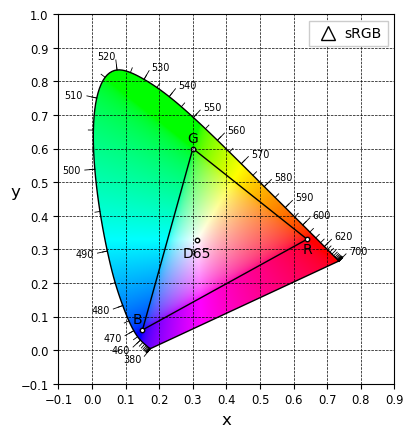

In [2]:
xy_diagram = xyDiagram()
xy_diagram.draw()
xy_diagram.save_fig('./fig/xy_chromaticity_diagram.png')

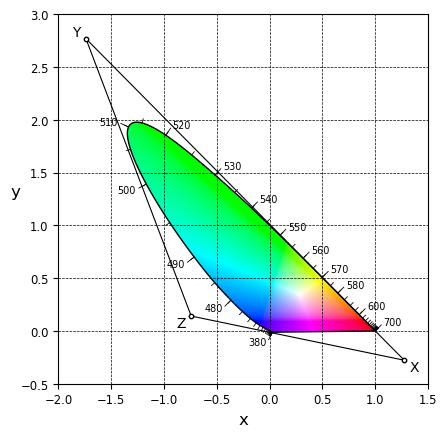

In [3]:
rg_diagram = rgDiagram()
rg_diagram.draw()
rg_diagram.save_fig('./fig/rg_chromaticity_diagram.png')

In [4]:
class TestDiagram(xyDiagram):
    '''可选Y的设置.'''
    def __init__(self, ax=None, Y=1):
        self.Y = Y
        super().__init__(ax)

    def generate_RGB(self):
        N = 256
        x = np.linspace(0, 1, N)
        y = np.linspace(0, 1, N).clip(1e-3, 1)
        x, y = np.meshgrid(x, y)
        
        if self.Y == 'linear':
            Y = np.linspace(0, 1, N)
            Y = np.broadcast_to(Y[:, np.newaxis], x.shape)
        elif self.Y == 'normalize':
            Y = np.ones_like(x)
        else:
            Y = np.ones_like(x) * self.Y
        
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        if self.Y == 'normalize':
            RGB = normalize_by_maximum(RGB)
        RGB = gamma_encoding(RGB.clip(0, 1))
        
        return RGB
    
    def draw(self):
        self.set_axes()
        self.ax.set_xlim(0, 0.8)
        self.ax.set_ylim(0, 0.9)
        self.add_chromaticity()

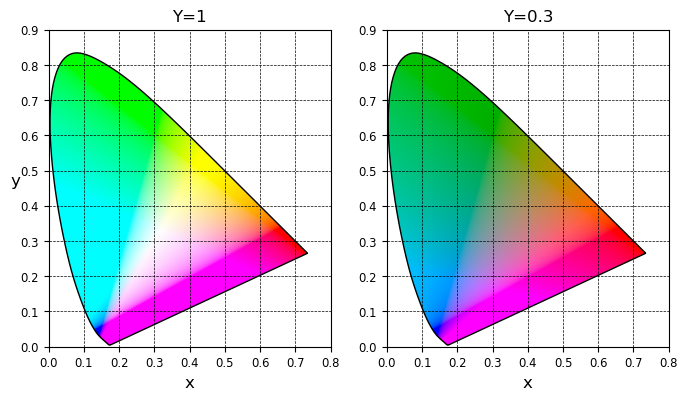

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
TestDiagram(axes[0], Y=1).draw()
TestDiagram(axes[1], Y=0.3).draw()
axes[1].set_ylabel('')
axes[0].set_title('Y=1')
axes[1].set_title('Y=0.3')
fig.savefig('./fig/test_Y1.png', dpi=300, bbox_inches='tight')

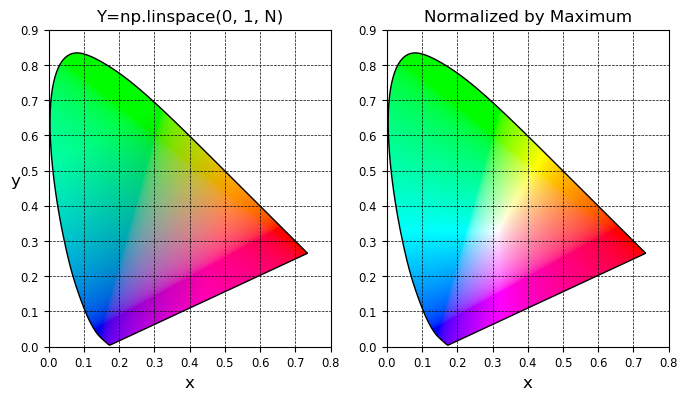

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
TestDiagram(axes[0], Y='linear').draw()
TestDiagram(axes[1], Y='normalize').draw()
axes[1].set_ylabel('')
axes[0].set_title('Y=np.linspace(0, 1, N)')
axes[1].set_title('Normalized by Maximum')
fig.savefig('./fig/test_Y2.png', dpi=300, bbox_inches='tight')

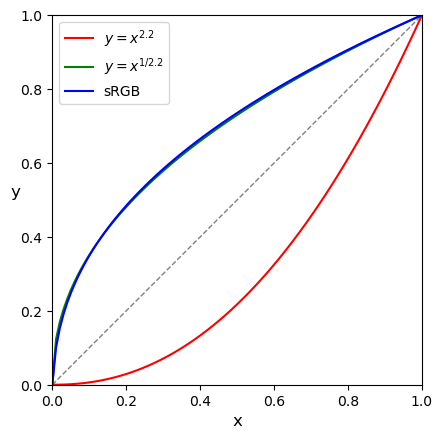

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

x = np.linspace(0, 1, 100)
y1 = x**2.2
y2 = x**(1 / 2.2)
y3 = gamma_encoding(x)

ax.plot(x, x, ls='--', lw=1, c='gray')
ax.plot(x, y1, c='r', label='$y=x^{2.2}$')
ax.plot(x, y2, c='g', label='$y=x^{1/2.2}$')
ax.plot(x, y3, c='b', label='sRGB')
ax.legend()

ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('y', fontsize='large', rotation=0)
fig.savefig('./fig/gamma_curve.png', dpi=300, bbox_inches='tight')